# COMP5318 - Machine Learning and Data Mining: Assignment 1
<div style="text-align: right"> Due: Friday Week 7 - Fri 8 April 2022 11:59PM </div>

# 1. Summary
The goal of this assignment is to build a classifier to classify some grayscale images of the size 28x28 into a set of categories. The dimension of the original data is large, so you need to be smart on which method you gonna use and perhaps perform a pre-processing step to reduce the amount of computation. Part of your marks will be a function of the performance of your classifier on the test set.

# 2. Dataset description
The dataset can be downloaded from Canvas. The dataset consists of a training set of 30,000 examples and a test set of 5,000 examples. They belong to 10 different categories. The validation set is not provided, but you can randomly pick a subset of the training set for validation. The features of the 5,000 test examples are given, you will analyse the performance of your proposed method by uploading the predicted labels of test examples onto [Kaggle Leaderboard](https://www.kaggle.com/t/a781604ffe46a42f903dd4be1b9daf16). You can find the instruction of using the leaderboard in Part 5.2. The leaderboard will compute the accuracy of your model, and team ranking will be shown based on the performance. Please note that we provide only PART of the original Fashion-MNIST, you must use the GIVEN `train.csv` (not the original dataset from the official website) for training; or it will be considered as cheating. <br />
Here are examples illustrating samples of the dataset (each class takes one row):

<img src="Dataset_image.jpg" alt="DataSet" title="DataSet" width="450" height="300" />

There are 10 classes in total:

    - 0 T-shirt/Top
    - 1 Trouser
    - 2 Pullover
    - 3 Dress
    - 4 Coat
    - 5 Sandal
    - 6 Shirt
    - 7 Sneaker
    - 8 Bag
    - 9 Ankle boot

Following is the cpu stats

In [4]:
from psutil import *



In [5]:
cpu_count()

2

In [6]:
cpu_stats()

scpustats(ctx_switches=684486, interrupts=497247, soft_interrupts=516001, syscalls=0)

In [7]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2200.202
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	: 4400.40
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 b

In [8]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         108G   40G   69G  37% /
tmpfs            64M     0   64M   0% /dev
shm             5.8G     0  5.8G   0% /dev/shm
/dev/root       2.0G  1.2G  817M  59% /sbin/docker-init
tmpfs           6.4G   32K  6.4G   1% /var/colab
/dev/sda1        81G   44G   38G  54% /etc/hosts
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [9]:
virtual_memory()

svmem(total=13622190080, available=12279713792, percent=9.9, used=1128124416, free=10084958208, active=1581498368, inactive=1698426880, buffers=189693952, cached=2219413504, shared=1204224, slab=188616704)

In [10]:
!python --version

Python 3.7.13


## 3.1 load the data

To read the *csv* file and load the data into a dataframe using pandas. 

The **training data files are in the ./Input/train** and **testing data file are in ./Input/test**. <br /> Use the following code:

The required version of matplotlib is above 3.4.3 for the bar plot in this file, pls check your version of matplotlib and if necessary update the matplotlib version

In [1]:
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.2.2


In [11]:
# pip install -U matplotlib

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
pd.set_option('display.max_columns', 10)

In [ ]:
# train.csv including feature and label using for training model.
data_train_df = pd.read_csv('./Input/train.csv') 

In [ ]:
data_train_df.head()

,id,v1,v2,v3,v4,...,v781,v782,v783,v784,label
0,0,0,0,0,0,...,0,0,0,0,2
1,1,0,0,0,0,...,0,0,0,0,1
2,2,0,0,0,0,...,0,0,0,0,1
3,3,0,0,0,1,...,0,0,0,0,4
4,4,0,0,0,0,...,0,0,0,0,8


Then data would be a dataframe with 30000 samples including 784 features (from v1 to v784) and its label.

In [ ]:
# Selecting input feature
data_train_feature = data_train_df.loc[:, "v1":"v784"].to_numpy()

# Selecting output lable 
data_train_label = data_train_df.label.to_numpy()

Showing a sample data. The first example belongs to class 2: Pullover

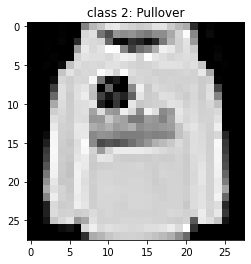

In [ ]:
import matplotlib.pyplot as plt
data_train_feature = data_train_feature.reshape((data_train_feature.shape[0], 28, 28))
plt.imshow(data_train_feature[0], cmap=plt.get_cmap('gray'))
plt.title("class " + str(data_train_label[0]) + ": Pullover" )
plt.show()

## 3.2 loading test data and output the prediction

In [ ]:
data_train_feature.shape

(30000, 28, 28)

In [ ]:
#test_input.csv includes 5000 samples used for label prediction. Test samples do not have labels.
data_test_df = pd.read_csv('./Input/test_input.csv', index_col=0) 

In [ ]:
data_test_df.head()

,v1,v2,v3,v4,v5,...,v780,v781,v782,v783,v784
id,,,,,,,,,,,
0,0,0,0,0,0,...,0,0,0,0,0
1,0,0,0,0,0,...,0,0,0,0,0
2,0,0,0,0,0,...,0,0,0,0,0
3,0,0,0,0,0,...,0,0,0,0,0
4,0,0,0,0,0,...,0,0,0,0,0


## 4.1 Code
### The code must clearly show :
    1. Pre-process data
    2. Details of your implementation for each algorithm
    3. Fine-tune hyper-parameters for each algorithm and running time
    4. The comparison result between 4 different algorithms including 3 single methods and one ensemble method
    5. Hardware and software specifications of the computer that you used for performance evaluation

### 4.1.1 Data pre-processing

In [ ]:
#cleaning visulized normalisation if distribution is skewed 
data_train_origin = data_train_df.loc[:, "v1":"v784"].to_numpy()
data_test_origin = data_test_df.loc[:, "v1":"v784"].to_numpy()

### hog transform, standardise and normalise the data

In [ ]:
%%time
from skimage.feature import hog
np.seterr(divide='ignore', invalid='ignore')
hog_train = list()
for image in data_train_origin.reshape(data_train_origin.shape[0],28,28):
    im_train=hog(image, pixels_per_cell=(4,4))
    hog_train.append(im_train)
hog_data_train = np.array(hog_train)
                
hog_test = list()
for image in data_test_origin.reshape(data_test_origin.shape[0],28,28):
    im_test=hog(image, pixels_per_cell=(4,4))
    hog_test.append(im_test)
hog_data_test = np.array(hog_test)
print(hog_data_train.shape, hog_data_test.shape)


(30000, 2025) (5000, 2025)
CPU times: user 34.3 s, sys: 656 ms, total: 34.9 s
Wall time: 38.1 s


In [ ]:
%%time

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
# hog_data_train=np.nan_to_num(hog_data_train)

data_train_standerd= StandardScaler().fit_transform(hog_data_train)
train_normal = normalize(data_train_standerd)
pca = PCA(0.95)# choose minimal 95% of the principal components
pca.fit(train_normal)


CPU times: user 1min 1s, sys: 11.3 s, total: 1min 12s
Wall time: 1min


In [ ]:
%%time
data_test_standerd= StandardScaler().fit_transform(hog_data_test)
test_normal = normalize(data_test_standerd)

pca.fit(test_normal)

CPU times: user 16.9 s, sys: 1 s, total: 17.9 s
Wall time: 9.26 s


In [ ]:
test_normal = pca.transform(test_normal)
test_normal.shape

(5000, 333)

## Separate the test set and training set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    train_normal, data_train_label, random_state=0)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (22500, 333)
y_train shape: (22500,)


In [ ]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (7500, 333)
y_test shape: (7500,)


## KNN 

### Fitting of the KNN and Predication

KNN with default parameter

In [ ]:
%%time

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy on test set y: {:.5f}".format(accuracy_score(y_test, y_pred)))
accuracy_knn = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

Accuracy on test set y: 0.85440
              precision    recall  f1-score   support

           0       0.73      0.84      0.78       735
           1       0.94      0.97      0.95       748
           2       0.73      0.82      0.77       760
           3       0.89      0.86      0.87       770
           4       0.79      0.77      0.78       755
           5       0.97      0.89      0.93       758
           6       0.73      0.53      0.61       761
           7       0.89      0.95      0.92       781
           8       0.95      0.97      0.96       742
           9       0.94      0.96      0.95       690

    accuracy                           0.85      7500
   macro avg       0.86      0.86      0.85      7500
weighted avg       0.85      0.85      0.85      7500

CPU times: user 8.18 s, sys: 2.27 s, total: 10.4 s
Wall time: 7.28 s


KNN with turning parameter

In [ ]:
%%time

knn = KNeighborsClassifier(n_neighbors=7,p=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy on test set y: {:.5f}".format(accuracy_score(y_test, y_pred)))
accuracy_knn = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

Accuracy on test set y: 0.85920
              precision    recall  f1-score   support

           0       0.73      0.84      0.78       735
           1       0.93      0.97      0.95       748
           2       0.76      0.81      0.79       760
           3       0.89      0.86      0.87       770
           4       0.79      0.79      0.79       755
           5       0.97      0.89      0.93       758
           6       0.74      0.56      0.64       761
           7       0.89      0.96      0.92       781
           8       0.94      0.97      0.96       742
           9       0.94      0.95      0.95       690

    accuracy                           0.86      7500
   macro avg       0.86      0.86      0.86      7500
weighted avg       0.86      0.86      0.86      7500

CPU times: user 7.72 s, sys: 440 ms, total: 8.16 s
Wall time: 7.8 s


## Logistic Regression

Logistic regression default parameter

In [ ]:
%%time
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(n_jobs = -1)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
print("Accuracy on test set y: {:.5f}".format(accuracy_score(y_test, y_pred_log)))

accuracy_log = accuracy_score(y_test, y_pred_log)
print(classification_report(y_test, y_pred_log))

Accuracy on test set y: 0.86347
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       735
           1       0.96      0.96      0.96       748
           2       0.81      0.77      0.79       760
           3       0.86      0.88      0.87       770
           4       0.77      0.79      0.78       755
           5       0.94      0.92      0.93       758
           6       0.67      0.66      0.67       761
           7       0.90      0.94      0.92       781
           8       0.95      0.96      0.96       742
           9       0.96      0.94      0.95       690

    accuracy                           0.86      7500
   macro avg       0.86      0.86      0.86      7500
weighted avg       0.86      0.86      0.86      7500

CPU times: user 121 ms, sys: 131 ms, total: 252 ms
Wall time: 9.02 s


Logistic regression after turning

In [ ]:
%%time
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(penalty='l2',C = 5,solver = 'sag',max_iter=800,n_jobs = -1)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
print("Accuracy on test set y: {:.5f}".format(accuracy_score(y_test, y_pred_log)))
accuracy_log = accuracy_score(y_test, y_pred_log)
print(classification_report(y_test, y_pred_log))

Accuracy on test set y: 0.86587
              precision    recall  f1-score   support

           0       0.81      0.82      0.81       735
           1       0.96      0.96      0.96       748
           2       0.81      0.79      0.80       760
           3       0.86      0.87      0.87       770
           4       0.78      0.79      0.78       755
           5       0.95      0.93      0.94       758
           6       0.67      0.67      0.67       761
           7       0.92      0.95      0.93       781
           8       0.97      0.95      0.96       742
           9       0.95      0.95      0.95       690

    accuracy                           0.87      7500
   macro avg       0.87      0.87      0.87      7500
weighted avg       0.87      0.87      0.87      7500

CPU times: user 28.3 s, sys: 52 ms, total: 28.3 s
Wall time: 28.2 s


## Naïve Bayes

we tried two different naive bayes methods and found out that gaussian will gives us a better result on valid set

In [ ]:
%%time
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
#GaussianNB
Gauss = GaussianNB()
Gauss.fit(X_train, y_train)
y_pred_Gauss = Gauss.predict(X_test)
Berno=BernoulliNB()
Berno.fit(X_train, y_train)
y_pred_Berno = Berno.predict(X_test)
print("Accuracy of Gauss on test set y: {:.5f}".format(accuracy_score(y_test, y_pred_Gauss)))
accuracy_NB = accuracy_score(y_test, y_pred_Gauss)
print("Accuracy of Berno on test set y: {:.5f}".format(accuracy_score(y_test, y_pred_Berno)))
print(classification_report(y_test, y_pred_Gauss))


Accuracy of Gauss on test set y: 0.79333
Accuracy of Berno on test set y: 0.77707
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       735
           1       0.95      0.86      0.90       748
           2       0.75      0.69      0.72       760
           3       0.71      0.77      0.74       770
           4       0.75      0.72      0.73       755
           5       0.88      0.88      0.88       758
           6       0.50      0.61      0.55       761
           7       0.88      0.88      0.88       781
           8       0.88      0.89      0.89       742
           9       0.94      0.90      0.92       690

    accuracy                           0.79      7500
   macro avg       0.80      0.79      0.80      7500
weighted avg       0.80      0.79      0.80      7500

CPU times: user 474 ms, sys: 392 ms, total: 866 ms
Wall time: 976 ms


## SVM

this is default SVM

In [ ]:
%%time
from sklearn.svm import SVC
svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)
y_pred_svc = svc_classifier.predict(X_test)
print("Accuracy on test set y: {:.5f}".format(accuracy_score(y_test, y_pred_svc)))
accuracy_SVM = accuracy_score(y_test, y_pred_svc)
print(classification_report(y_test, y_pred_svc))

Accuracy on test set y: 0.88773
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       735
           1       0.98      0.96      0.97       748
           2       0.84      0.83      0.83       760
           3       0.86      0.91      0.88       770
           4       0.84      0.82      0.83       755
           5       0.97      0.94      0.96       758
           6       0.71      0.70      0.71       761
           7       0.93      0.96      0.94       781
           8       0.98      0.97      0.97       742
           9       0.96      0.96      0.96       690

    accuracy                           0.89      7500
   macro avg       0.89      0.89      0.89      7500
weighted avg       0.89      0.89      0.89      7500

CPU times: user 1min 8s, sys: 119 ms, total: 1min 8s
Wall time: 1min 14s


this is after turning SVM

In [ ]:
%%time
from sklearn.svm import SVC
svc_classifier = SVC(C=3, gamma=1.2 )
svc_classifier.fit(X_train, y_train)
y_pred_svc = svc_classifier.predict(X_test)
print("Accuracy on test set y: {:.5f}".format(accuracy_score(y_test, y_pred_svc)))
accuracy_SVM = accuracy_score(y_test, y_pred_svc)
print(classification_report(y_test, y_pred_svc))

Accuracy on test set y: 0.89347
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       735
           1       0.98      0.96      0.97       748
           2       0.84      0.84      0.84       760
           3       0.88      0.90      0.89       770
           4       0.85      0.83      0.84       755
           5       0.97      0.96      0.96       758
           6       0.72      0.72      0.72       761
           7       0.94      0.96      0.95       781
           8       0.98      0.98      0.98       742
           9       0.96      0.95      0.96       690

    accuracy                           0.89      7500
   macro avg       0.89      0.89      0.89      7500
weighted avg       0.89      0.89      0.89      7500

CPU times: user 1min 8s, sys: 68.2 ms, total: 1min 8s
Wall time: 1min 9s


## since this gives us the best performance on holdout test, we decide to use it to 

## make prediction on test file

In [ ]:
%%time
#2.98 current best
# svc_classifier = SVC(C=2.975)
# svc_classifier.fit(X_train, y_train)
test_pred_svc = svc_classifier.predict(test_normal)

CPU times: user 23.6 s, sys: 25.6 ms, total: 23.6 s
Wall time: 26 s


In [ ]:
output_df = pd.DataFrame(test_pred_svc, columns = ['label'])
output_df
output_df.to_csv('./Output/test_output.csv', sep=",", float_format='%d', index_label="id")

## Random forest

random forest with default parameter

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier

ran_for = RandomForestClassifier(n_jobs =-1)
ran_for.fit(X_train, y_train)
y_pred_rf = ran_for.predict(X_test)
print("Random forest ensemble - accuracy on test set:")
print(accuracy_score(y_test, y_pred_rf))
accuracy_forest = accuracy_score(y_test, y_pred_rf)
print(classification_report(y_test, y_pred_rf))

Random forest ensemble - accuracy on test set:
0.8368
              precision    recall  f1-score   support

           0       0.77      0.80      0.79       735
           1       0.97      0.94      0.96       748
           2       0.75      0.76      0.75       760
           3       0.81      0.86      0.83       770
           4       0.74      0.78      0.76       755
           5       0.92      0.92      0.92       758
           6       0.65      0.53      0.58       761
           7       0.89      0.92      0.90       781
           8       0.92      0.95      0.94       742
           9       0.94      0.92      0.93       690

    accuracy                           0.84      7500
   macro avg       0.84      0.84      0.84      7500
weighted avg       0.83      0.84      0.83      7500

CPU times: user 1min, sys: 572 ms, total: 1min 1s
Wall time: 31.5 s


random forest after turning

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier

ran_for = RandomForestClassifier(n_estimators=500,min_samples_leaf=1 , n_jobs =-1)
ran_for.fit(X_train, y_train)
y_pred_rf = ran_for.predict(X_test)
print("Random forest ensemble - accuracy on test set:")
print(accuracy_score(y_test, y_pred_rf))
accuracy_forest = accuracy_score(y_test, y_pred_rf)
print(classification_report(y_test, y_pred_rf))

Random forest ensemble - accuracy on test set:
0.8482666666666666
              precision    recall  f1-score   support

           0       0.78      0.81      0.80       735
           1       0.98      0.94      0.96       748
           2       0.78      0.76      0.77       760
           3       0.80      0.87      0.83       770
           4       0.76      0.81      0.78       755
           5       0.92      0.93      0.93       758
           6       0.68      0.58      0.63       761
           7       0.90      0.92      0.91       781
           8       0.93      0.95      0.94       742
           9       0.94      0.92      0.93       690

    accuracy                           0.85      7500
   macro avg       0.85      0.85      0.85      7500
weighted avg       0.85      0.85      0.85      7500

CPU times: user 4min 52s, sys: 443 ms, total: 4min 53s
Wall time: 2min 31s


### 4.1.3 Parameter Tuning

For each classifiers we would like to find the best parameters using grid search with k-fold (k>=5) cross validation.

### Cross validation with 5-fold to find the best parameter

### KNN CV

### turning for KNN

In [ ]:
%%time

param_grid = {'n_neighbors': [1,3,5,7],
              'p': [2]}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5,
                          return_train_score=True)
grid_search.fit(X_train, y_train)
print("Test set score: {:.4f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))


Test set score: 0.8592
Best parameters: {'n_neighbors': 7, 'p': 2}
Best cross-validation score: 0.8647
Best estimator:
KNeighborsClassifier(n_neighbors=7)
CPU times: user 5min 57s, sys: 15.1 s, total: 6min 12s
Wall time: 4min 1s


### turning for logistic regression

In [ ]:
%%time

param_grid={'C': [5,7,10], 'solver':['sag','lbfgs','newton-cg','saga']}

grid_search = GridSearchCV(LogisticRegression(penalty='l2',max_iter=800), param_grid, cv=5,
                          return_train_score=True,n_jobs =-1)
grid_search.fit(X_train, y_train)
print("Test set score: {:.4f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))


Test set score: 0.8657
Best parameters: {'C': 5, 'solver': 'sag'}
Best cross-validation score: 0.8731
Best estimator:
LogisticRegression(C=5, max_iter=800, solver='sag')
CPU times: user 32.1 s, sys: 546 ms, total: 32.6 s
Wall time: 13min 30s


## SVM turning

In [ ]:
%%time
from sklearn.svm import SVC
param_grid={'C': [2.98, 3],'gamma' : ['scale',1.2]}

grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Test set score: {:.4f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Test set score: 0.8935
Best parameters: {'C': 3, 'gamma': 1.2}
Best cross-validation score: 0.8983
Best estimator:
SVC(C=3, gamma=1.2)
CPU times: user 13min 37s, sys: 983 ms, total: 13min 38s
Wall time: 13min 35s


### turning for random forest

In [ ]:
%%time
param_grid={'n_estimators': [100,500]}

grid_search = GridSearchCV(RandomForestClassifier(n_jobs =-1), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Test set score: {:.4f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))


Test set score: 0.8424
Best parameters: {'n_estimators': 500}
Best cross-validation score: 0.8518
Best estimator:
RandomForestClassifier(n_estimators=500, n_jobs=-1)
CPU times: user 5min 20s, sys: 3.15 s, total: 5min 23s
Wall time: 15min 8s


### 4.1.4 Classifier comparisons

After finding the best parameter for each algorithm, we would like to make comparisons between all classifiers using their own best hyper-parameters.

In [ ]:
tests = ["KNN","Logistic","naive bayes","SVM","Random Forest"]
results = []
results.append(accuracy_knn)
results.append(accuracy_log)
results.append(accuracy_NB)
results.append(accuracy_SVM)
results.append(accuracy_forest)



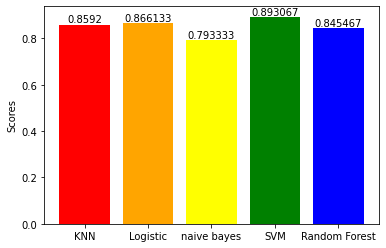

In [ ]:

fig, ax = plt.subplots()

p1 = ax.bar(tests, results, width=0.8, label='method',color = ['red', 'orange', 'yellow', 'green', 'blue'])
ax.set_ylabel('Scores')
ax.bar_label(p1, label_type='edge')
plt.plot()  
plt.savefig('./Output/comparison_g.jpg')